# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

**Импорт библиотек и знакомство с данными.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
display(data.head(10))
data.tail(10)#общий вид таблицы данных

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23689,13,3550000.0,35.30,2018-02-28T00:00:00,1,2.86,15.0,16.3,4,NaN,...,9.10,2.0,Санкт-Петербург,17284.0,16081.0,1.0,353.0,2.0,652.0,29.0
23690,3,5500000.0,52.00,2018-07-19T00:00:00,2,NaN,5.0,31.0,2,NaN,...,6.00,NaN,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0
23691,11,9470000.0,72.90,2016-10-13T00:00:00,2,2.75,25.0,40.3,7,NaN,...,10.60,1.0,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,519.0
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,NaN,5.0,17.5,4,NaN,...,6.00,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23693,9,4600000.0,62.40,2016-08-05T00:00:00,3,2.60,9.0,40.0,8,NaN,...,8.00,0.0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.50,5.0,12.3,1,NaN,...,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
data.info()#общая информация, 22 колонки, не все данные заполнены
data_before_clean = data['total_images'].count()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

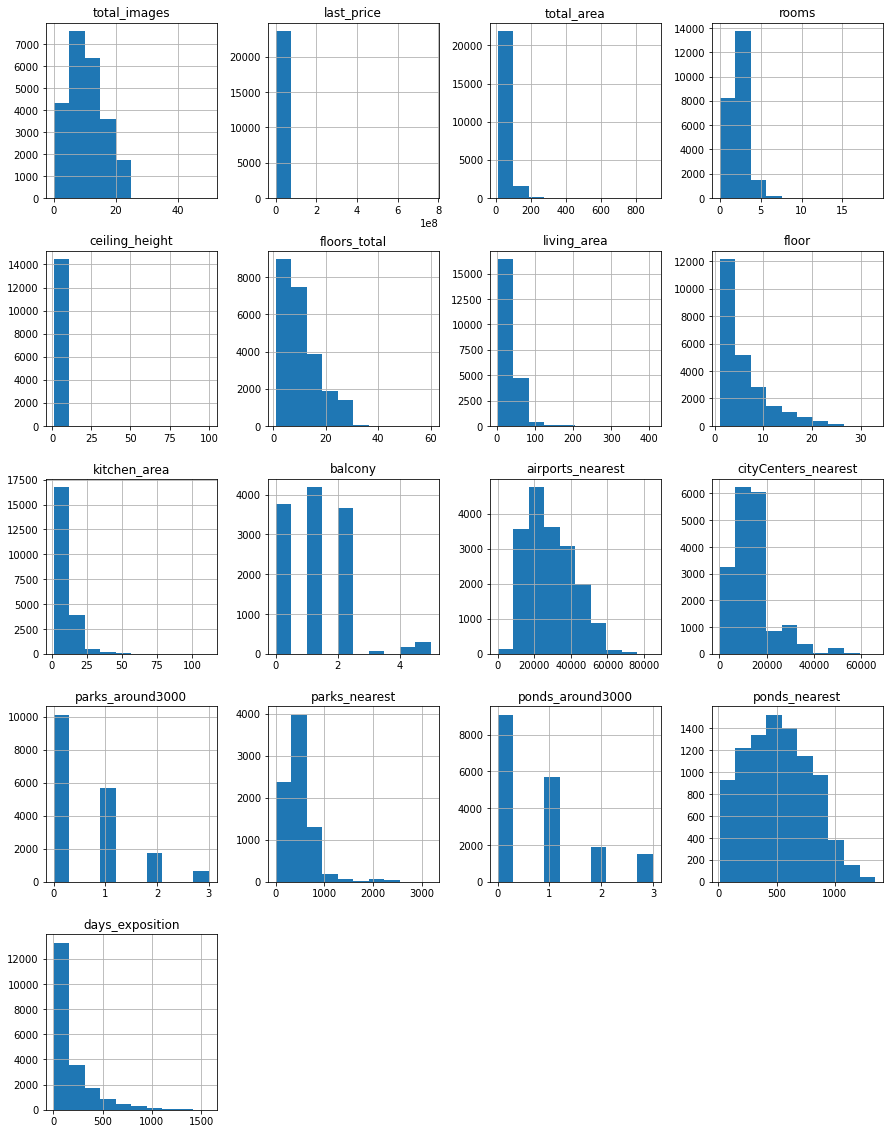

In [3]:
data.hist(figsize=(15, 20))#гистограммы по всей таблице
plt.show()

В датафрейме всего 22 колонки и 23699 строк. В 8 колонках нет пропусков, в остальных есть пропущенные значения. Можно отметить некорректные названия некоторых столбцов, а также неверные типы данных.

### Предобработка данных

**Переименование столбцов:**

In [4]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [5]:
data = data.rename(columns={'cityCenters_nearest':'city_centers_nearest', 
                     'parks_around3000': 'parks_around_3000', 
                    'ponds_around3000':'ponds_around_3000'})

**Поиск пропущенных значений:**

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

* ceiling_height (высота потолков (м)) - пропущено 9195 значений. Вероятно, высота неизвестна продавцу, оставим как есть;
* floors_total (всего этажей в доме) - пропущено 86 значений. Пропущенных данных не столь много, эти строки можно удалить;
* living_area (жилая площадь в квадратных метрах (м²)) - пропущено 1903 значений. Данные не заполнены, оставим как есть;
* is_apartment (апартаменты (булев тип)) - пропущено 20924 значений. Вероятно, это не апартаменты, заполним 'False';
* kitchen_area (площадь кухни в квадратных метрах (м²)) - пропущено 2278 значений. Данные не заполнены, оставим как есть;
* balcony (число балконов) - пропущено 11519 значений. Может быть нет балкона, заполним '0';
* locality_name (название населённого пункта) - пропущено 49 значений. Пропущенных данных не столь много, эти строки можно удалить;
* airports_nearest (расстояние до ближайшего аэропорта в метрах (м)) - пропущено 5542 значений. Вероятно, нет данных, оставим как есть;
* city_centers_nearest (расстояние до центра города (м)) - пропущено 5519 значений. Вероятно, нет данных, оставим как есть;
* parks_around_3000 (число парков в радиусе 3 км) - пропущено 5518 значений. Вероятно, нет данных, оставим как есть;
* parks_nearest (расстояние до ближайшего парка (м)) - пропущено 15620 значений. Вероятно, нет данных, оставим как есть;
* ponds_around_3000 (число водоёмов в радиусе 3 км) - пропущено 5518 значений. Вероятно, нет данных, оставим как есть;
* ponds_nearest (расстояние до ближайшего водоёма (м)) - пропущено 14589 значений. Вероятно, нет данных, оставим как есть;
* days_exposition (сколько дней было размещено объявление (от публикации до снятия)) - пропущено 3181 значение. Вероятно, нет данных, оставим как есть. 

**Запонение пропущенных значений:**

In [7]:
data['is_apartment'] = data['is_apartment'].fillna('False')
data['balcony'] = data['balcony'].fillna(0) 

**Удаление строк с пропущенными значениями:**

In [8]:
data = data.dropna(subset=['floors_total', 'locality_name']).reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23565 entries, 0 to 23564
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        14481 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           21700 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  object 
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          21343 non-null  float64
 13  balcony               23565 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

**Изменение типов данных:**

Тип данных необходимо изменить в столбцах `last_price`, поскольку это должны быть целые значения, `first_day_exposition`, поскольку это дата, `floors_total`, поскольку количество этажей целое значение, `is_apartment`, поскольку это булев тип, `balcony`, поскольку это отражает кол-во балконов.

In [9]:
data['last_price'] = data['last_price'].astype('int')
data['floors_total'] = data['floors_total'].astype('int')
data['balcony'] = pd.to_numeric(data['balcony'], errors='coerce').astype('int')
data['is_apartment'] = data['is_apartment'].astype('bool') 
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')


data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23565 entries, 0 to 23564
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int64         
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        14481 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           21700 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          21343 non-null  float64       
 13  balcony         

**Устранение явных дубликатов:**

In [10]:
data.duplicated().sum()

0

Явных дубликатов в таблице нет.

**Устранение неявных дубликатов:**

In [11]:
len(data['locality_name'].unique())

364

In [12]:
data['locality_name'] = data['locality_name'].str.lower() # преобразую все названия населенных пунктов в нижний регистр
data['locality_name'].sort_values().unique() # изучение данных

array(['бокситогорск', 'волосово', 'волхов', 'всеволожск', 'выборг',
       'высоцк', 'гатчина', 'городской поселок большая ижора',
       'городской поселок янино-1', 'городской посёлок будогощь',
       'городской посёлок виллози', 'городской посёлок лесогорский',
       'городской посёлок мга', 'городской посёлок назия',
       'городской посёлок новоселье', 'городской посёлок павлово',
       'городской посёлок рощино', 'городской посёлок свирьстрой',
       'городской посёлок советский', 'городской посёлок фёдоровское',
       'городской посёлок янино-1', 'деревня агалатово', 'деревня аро',
       'деревня батово', 'деревня бегуницы', 'деревня белогорка',
       'деревня большая вруда', 'деревня большая пустомержа',
       'деревня большие колпаны', 'деревня большое рейзино',
       'деревня большой сабск', 'деревня бор', 'деревня борисова грива',
       'деревня ваганово', 'деревня вартемяги', 'деревня вахнова кара',
       'деревня выскатка', 'деревня гарболово', 'деревня глинка

In [13]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е') #замена всех е на ё

data['locality_name'] = data['locality_name'].str.replace('поселок городского типа', 'поселок') #замена наименования
data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'поселок') #замена наименованияи
data['locality_name'].sort_values().unique()

array(['бокситогорск', 'волосово', 'волхов', 'всеволожск', 'выборг',
       'высоцк', 'гатчина', 'деревня агалатово', 'деревня аро',
       'деревня батово', 'деревня бегуницы', 'деревня белогорка',
       'деревня большая вруда', 'деревня большая пустомержа',
       'деревня большие колпаны', 'деревня большое рейзино',
       'деревня большой сабск', 'деревня бор', 'деревня борисова грива',
       'деревня ваганово', 'деревня вартемяги', 'деревня вахнова кара',
       'деревня выскатка', 'деревня гарболово', 'деревня глинка',
       'деревня горбунки', 'деревня гостилицы', 'деревня заклинье',
       'деревня заневка', 'деревня зимитицы', 'деревня извара',
       'деревня иссад', 'деревня калитино', 'деревня кальтино',
       'деревня камышовка', 'деревня каськово', 'деревня келози',
       'деревня кипень', 'деревня кисельня', 'деревня колтуши',
       'деревня коркино', 'деревня котлы', 'деревня кривко',
       'деревня кудрово', 'деревня кузьмолово', 'деревня курковицы',
       'дер

In [14]:
len(data['locality_name'].unique())

322

До устранения неявных дубликатов в таблице было `364` населенных пункта, после осталось `322`.

**Обработка аномальных значений:**

In [15]:
data.describe() # описание таблицы

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
count,23565.000000,2.356500e+04,23565.000000,23565.000000,14481.000000,23565.000000,21700.000000,23565.000000,21343.000000,23565.000000,18041.000000,18064.000000,18065.000000,8030.000000,18065.000000,9036.000000,20394.000000
mean,9.878421,6.540058e+06,60.322824,2.070656,2.771283,10.675875,34.454822,5.878124,10.560994,0.593677,28797.082701,14192.656056,0.611569,490.580448,0.769499,518.289509,180.741395
std,5.681156,1.091093e+07,35.657060,1.078591,1.261983,6.594823,22.045359,4.871485,5.900630,0.960660,12632.499735,8613.348153,0.802088,341.572956,0.938669,278.009558,219.732782
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.510000,5.000000,18.600000,2.000000,7.000000,0.000000,18565.000000,9238.000000,0.000000,288.000000,0.000000,293.000000,45.000000
50%,9.000000,4.646000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26757.000000,13096.500000,0.000000,455.000000,1.000000,503.000000,95.000000
75%,14.000000,6.790000e+06,69.700000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,1.000000,37273.000000,16285.000000,1.000000,612.000000,1.000000,730.000000,231.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


В данных столбца `last_price` минимальное значение стоимости 12 190, что маловероятно. Необходимо ознакомится с данными, возможно, это выброс.

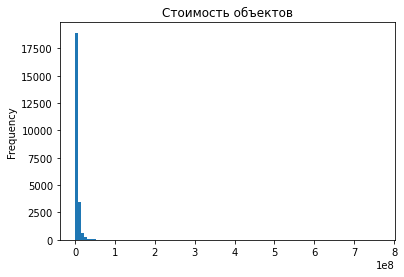

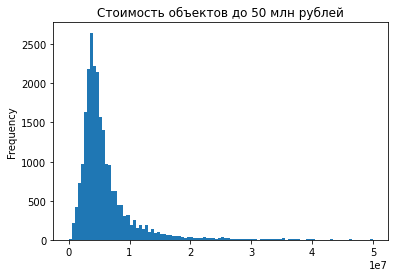

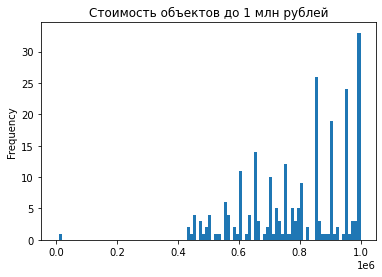

In [16]:
data['last_price'].plot(kind='hist', bins=100, title='Стоимость объектов')
plt.show()
data['last_price'].plot(kind='hist', bins=100, title='Стоимость объектов до 50 млн рублей', range=(0,50000000))
plt.show()
data['last_price'].plot(kind='hist', bins=100, title='Стоимость объектов до 1 млн рублей', range=(0,1000000))
plt.show()

In [17]:
data.loc[data['last_price'] < 400000,'last_price'].count() # одну строку удалим из таблицы со значением стоимости меньше 400000, это аномальное значение

1

In [18]:
data = data.loc[data['last_price'] > 400000]

Рассмотрим значения столбца `total_area`.

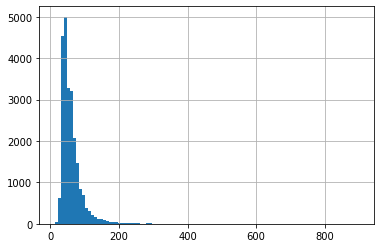

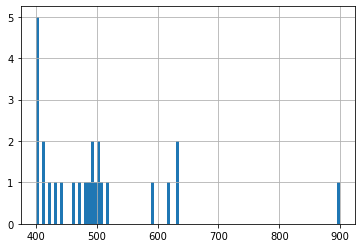

23

In [19]:
data['total_area'].hist(bins=100)
plt.show()
data['total_area'].hist(bins=100, range=(400,900))
plt.show()
data.loc[data['total_area'] > 400,'total_area'].count() # 23 квартиры с площадью больше 400 квадратных метров, 
# возможно была ошибка и нужно разделить на 10, возможно это выбросы, которые удалим, 
# поскольку у нас максимально 19 комнат, а комната, в среднем, по 17 квадратных метров.

In [20]:
data = data.loc[data['total_area'] < 400].reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23538 entries, 0 to 23537
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23538 non-null  int64         
 1   last_price            23538 non-null  int64         
 2   total_area            23538 non-null  float64       
 3   first_day_exposition  23538 non-null  datetime64[ns]
 4   rooms                 23538 non-null  int64         
 5   ceiling_height        14462 non-null  float64       
 6   floors_total          23538 non-null  int64         
 7   living_area           21680 non-null  float64       
 8   floor                 23538 non-null  int64         
 9   is_apartment          23538 non-null  bool          
 10  studio                23538 non-null  bool          
 11  open_plan             23538 non-null  bool          
 12  kitchen_area          21321 non-null  float64       
 13  balcony         

Рассмотрим значения столбца `ceiling_height`.

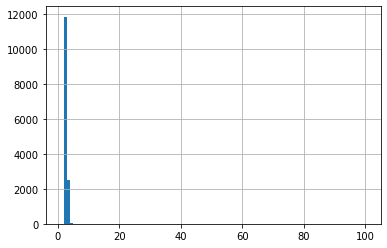

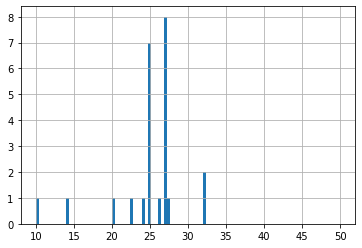

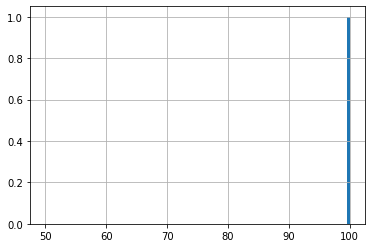

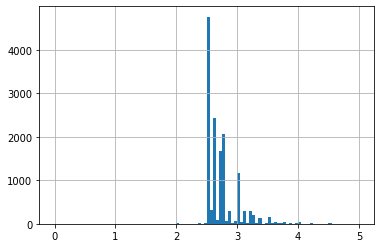

In [21]:
data['ceiling_height'].hist(bins=100)
plt.show()
data['ceiling_height'].hist(bins=100, range=(10,50))
plt.show()
data['ceiling_height'].hist(bins=100, range=(50,100))
plt.show()
data['ceiling_height'].hist(bins=100, range=(0,5))
plt.show()

Потолок с высотой 100 метров и меньше 2 метров необходимо удалить, это выброс. Потолки с высотой от 10 до 20 метров тоже необходимо удалить, маловерояны такие значения. Потолки от 20 до 36 метров могут быть случайно домножены на 10, можно разделить значения и оставить данные строки. 

In [22]:
data = data.query('2 < ceiling_height < 100 | ceiling_height.isnull()').reset_index(drop=True)
data.loc[data['ceiling_height'] > 20, 'ceiling_height'] = data.loc[data['ceiling_height'] > 20, 'ceiling_height']/10
data = data.query('ceiling_height < 10 | ceiling_height.isnull()').reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23520 entries, 0 to 23519
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23520 non-null  int64         
 1   last_price            23520 non-null  int64         
 2   total_area            23520 non-null  float64       
 3   first_day_exposition  23520 non-null  datetime64[ns]
 4   rooms                 23520 non-null  int64         
 5   ceiling_height        14444 non-null  float64       
 6   floors_total          23520 non-null  int64         
 7   living_area           21664 non-null  float64       
 8   floor                 23520 non-null  int64         
 9   is_apartment          23520 non-null  bool          
 10  studio                23520 non-null  bool          
 11  open_plan             23520 non-null  bool          
 12  kitchen_area          21306 non-null  float64       
 13  balcony         

Рассмотрим значения столбца `living_area`.

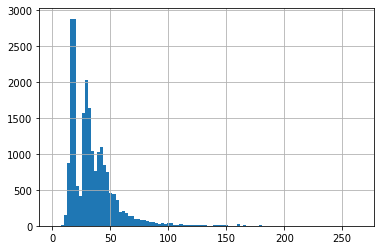

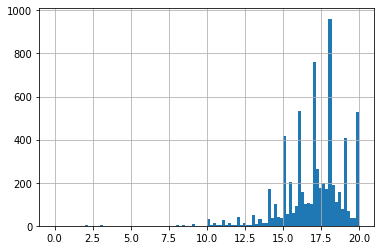

In [23]:
data['living_area'].hist(bins=100)
plt.show()
data['living_area'].hist(bins=100, range=(0,20))
plt.show()

In [24]:
data = data.query('living_area > 10 | living_area.isnull()').reset_index(drop=True)# уберем квартиры меньше 10 квадратных метров жилой площади, это выброс
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23464 entries, 0 to 23463
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23464 non-null  int64         
 1   last_price            23464 non-null  int64         
 2   total_area            23464 non-null  float64       
 3   first_day_exposition  23464 non-null  datetime64[ns]
 4   rooms                 23464 non-null  int64         
 5   ceiling_height        14410 non-null  float64       
 6   floors_total          23464 non-null  int64         
 7   living_area           21608 non-null  float64       
 8   floor                 23464 non-null  int64         
 9   is_apartment          23464 non-null  bool          
 10  studio                23464 non-null  bool          
 11  open_plan             23464 non-null  bool          
 12  kitchen_area          21264 non-null  float64       
 13  balcony         

Рассмотрим значения столбца `kitchen_area`.

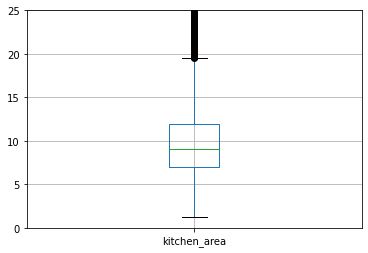

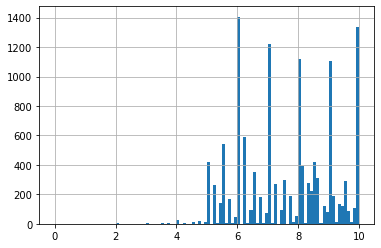

In [25]:
data.boxplot(column='kitchen_area')
plt.ylim(0, 25)
plt.show()
data['kitchen_area'].hist(bins=100, range=(0,10))
plt.show()

In [26]:
data = data.query('kitchen_area >= 4 | kitchen_area.isnull()').reset_index(drop=True)# уберем квартиры c кухнями меньше 4, потому что там даже не поместятся раковина, холодильник, плита и стол
data.info()
data_after_clean = data['total_images'].count()
save_data = data_after_clean / data_before_clean
print(f'Количество оставшихся строк в датафреме {save_data:.1%}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23436 entries, 0 to 23435
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23436 non-null  int64         
 1   last_price            23436 non-null  int64         
 2   total_area            23436 non-null  float64       
 3   first_day_exposition  23436 non-null  datetime64[ns]
 4   rooms                 23436 non-null  int64         
 5   ceiling_height        14392 non-null  float64       
 6   floors_total          23436 non-null  int64         
 7   living_area           21580 non-null  float64       
 8   floor                 23436 non-null  int64         
 9   is_apartment          23436 non-null  bool          
 10  studio                23436 non-null  bool          
 11  open_plan             23436 non-null  bool          
 12  kitchen_area          21236 non-null  float64       
 13  balcony         

После обработки аномальных значений были убраны строки с квартирами стоимостью меньше 400000 рублей, площадью более 400 м2, потолками меньше 2 метров и более 10 метров, жилой площадью менее 10 м2, площадью кухни меньше 4 м2.

Во время предобработки данных были переименованы столбцы, заполнены пропущенные значения, там, где это возможно, удалены строки, где пропущенных значений было не столь много, изменены типы данных, устранены неявные дубликаты в названиях населенных пунктов. Помимо этого, были выявлены аномальные значения в данных и удалены строки с ними. По результатам предобработки в датафрейме осталось 23436 строк из 23699 первоначальных, что составляет около 98,9 %.





### Посчитайте и добавьте в таблицу новые столбцы

In [27]:
data['year_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).year # добавление столбца с годом публикации

In [28]:
data['month_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).month # добавление столбца с месяцем публикации

In [29]:
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday # добавление столбца с днем публикации

In [30]:
data['price_for_1_meter'] = data['last_price'] / data['total_area'] # добавление столбца с ценой квадратного метра
data['price_for_1_meter'] = data['price_for_1_meter'].round(1)

In [31]:
def type_floor(row):
    if row['floor'] == 1:
        return 'Первый'
    elif row['floor'] == row['floors_total']:
        return 'Последний'
    else:
        return 'Другой'
    
data['type_floor'] = data.apply(type_floor, axis=1) # добавление столбца с типом этажа

In [32]:
data['city_centers_km'] = (data['city_centers_nearest'] / 1000).round(1) # добавление столбца с расстоянием в км до центра города

In [33]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,year_exposition,month_exposition,weekday_exposition,price_for_1_meter,city_centers_km
count,23436.000000,2.343600e+04,23436.000000,23436.000000,14392.000000,23436.000000,21580.000000,23436.000000,21236.000000,23436.000000,...,17962.000000,7974.000000,17962.000000,8973.000000,20284.000000,23436.000000,23436.000000,23436.000000,2.343600e+04,17961.000000
mean,9.878307,6.392855e+06,59.936273,2.069082,2.727613,10.673835,34.331401,5.872461,10.525213,0.593787,...,0.610901,490.597693,0.768066,518.775326,180.895977,2017.370157,6.402287,2.568100,9.909360e+04,14.206954
std,5.679570,8.233566e+06,32.421227,1.066133,0.290458,6.587718,20.748832,4.866039,5.736189,0.960248,...,0.802104,341.657526,0.938026,277.647381,219.965700,1.037712,3.493059,1.787617,4.813393e+04,8.615231
min,0.000000,4.300000e+05,13.000000,0.000000,2.200000,1.000000,10.080000,1.000000,4.000000,0.000000,...,0.000000,1.000000,0.000000,13.000000,1.000000,2014.000000,1.000000,0.000000,7.963000e+03,0.200000
25%,6.000000,3.420000e+06,40.000000,1.000000,2.510000,5.000000,18.700000,2.000000,7.000000,0.000000,...,0.000000,288.000000,0.000000,294.000000,45.000000,2017.000000,3.000000,1.000000,7.653060e+04,9.300000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,...,0.000000,455.000000,0.000000,503.000000,95.000000,2017.000000,6.000000,3.000000,9.492970e+04,13.100000
75%,14.000000,6.790000e+06,69.700000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,1.000000,...,1.000000,612.000000,1.000000,730.000000,231.000000,2018.000000,10.000000,4.000000,1.140351e+05,16.300000
max,50.000000,3.300000e+08,399.000000,19.000000,8.300000,60.000000,264.500000,33.000000,107.000000,5.000000,...,3.000000,3190.000000,3.000000,1344.000000,1580.000000,2019.000000,12.000000,6.000000,1.736842e+06,66.000000


### Проведите исследовательский анализ данных

Изучение, описание параметров, построение гистограмм:
  - общая площадь;
  - жилая площадь;
  - площадь кухни;
  - цена объекта;
  - количество комнат;
  - высота потолков;
  - этаж квартиры;
  - тип этажа квартиры («первый», «последний», «другой»);
  - общее количество этажей в доме;
  - расстояние до центра города в метрах;
  - расстояние до ближайшего аэропорта;
  - расстояние до ближайшего парка;
  - день и месяц публикации объявления

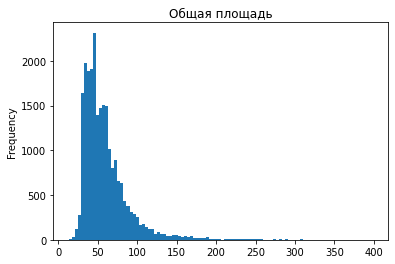

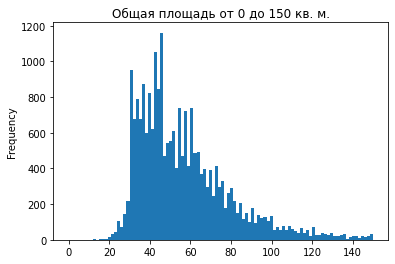

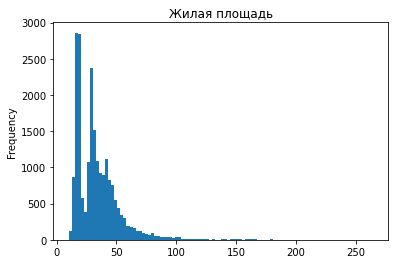

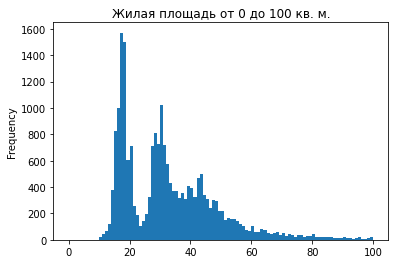

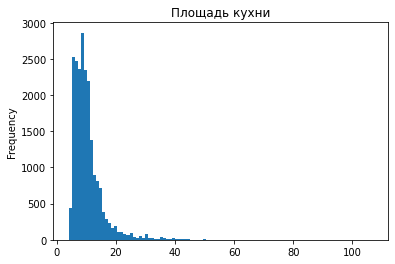

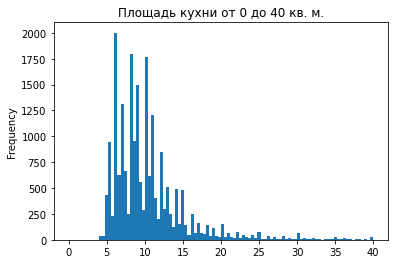

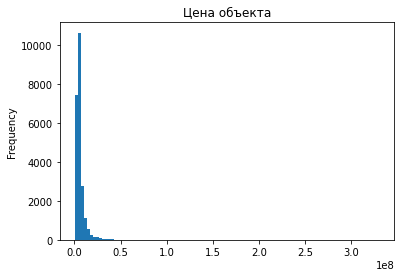

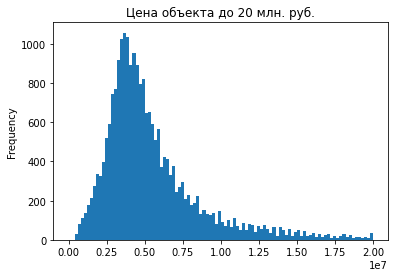

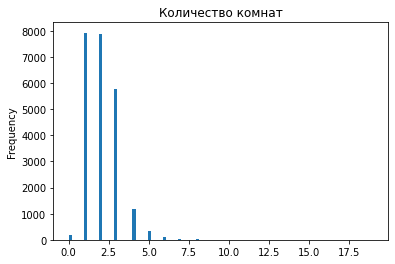

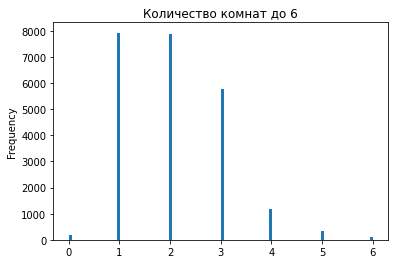

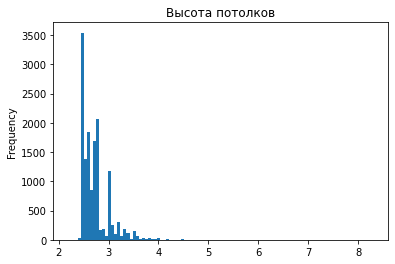

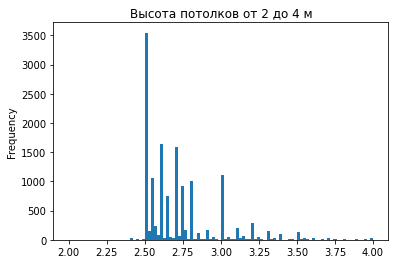

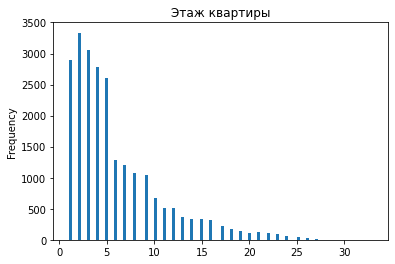

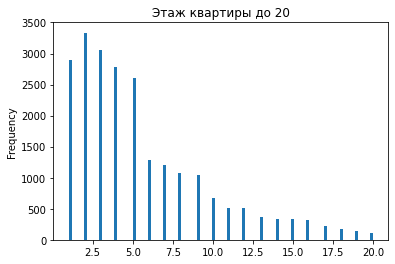

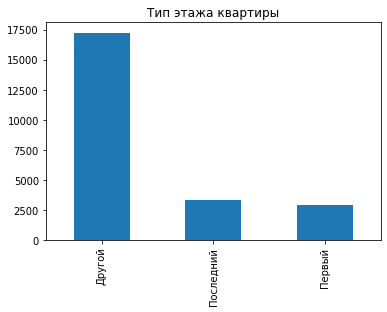

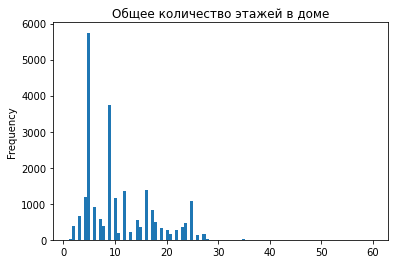

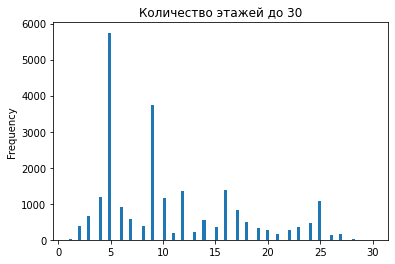

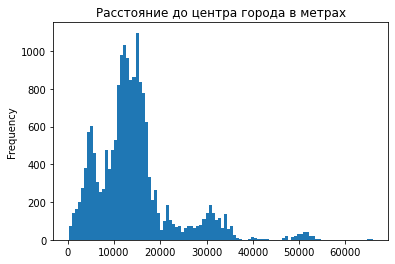

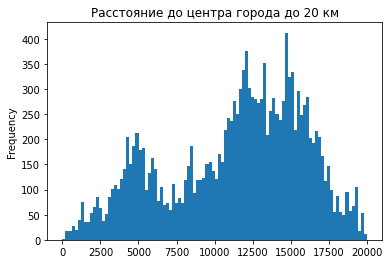

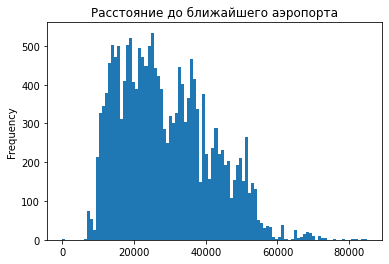

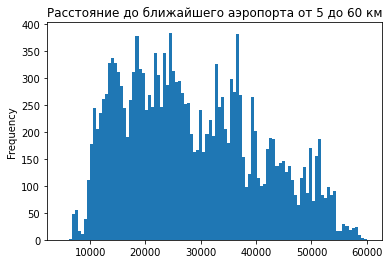

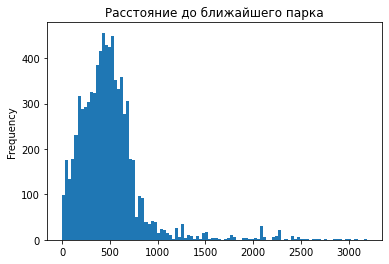

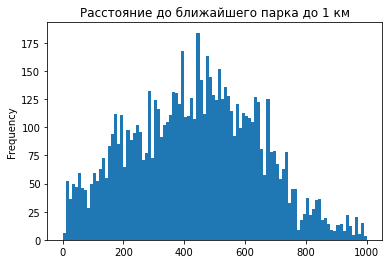

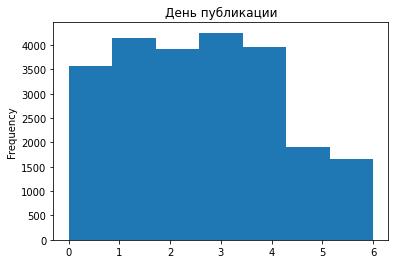

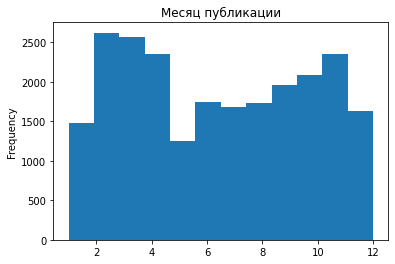

In [34]:
data['total_area'].plot(kind='hist', bins=100, title='Общая площадь')
plt.show()
data['total_area'].plot(kind='hist', bins=100, range=(0, 150), title='Общая площадь от 0 до 150 кв. м.')
plt.show()

data['living_area'].plot(kind='hist', bins=100, title='Жилая площадь')
plt.show()
data['living_area'].plot(kind='hist', bins=100, range=(0, 100), title='Жилая площадь от 0 до 100 кв. м.')
plt.show()

data['kitchen_area'].plot(kind='hist', bins=100, title='Площадь кухни')
plt.show()
data['kitchen_area'].plot(kind='hist', bins=100, range=(0, 40),title='Площадь кухни от 0 до 40 кв. м.')
plt.show()

data['last_price'].plot(kind='hist', bins=100, title='Цена объекта')
plt.show()
data['last_price'].plot(kind='hist', bins=100, range=(0, 20000000), title='Цена объекта до 20 млн. руб.')
plt.show()

data['rooms'].plot(kind='hist', bins=100, title='Количество комнат')
plt.show()
data['rooms'].plot(kind='hist', bins=100, range=(0, 6), title='Количество комнат до 6')
plt.show()

data['ceiling_height'].plot(kind='hist', bins=100, title='Высота потолков')
plt.show()
data['ceiling_height'].plot(kind='hist', bins=100, range=(2, 4), title='Высота потолков от 2 до 4 м')
plt.show()

data['floor'].plot(kind='hist', bins=100, title='Этаж квартиры')
plt.show()
data['floor'].plot(kind='hist', bins=100, range=(1, 20), title='Этаж квартиры до 20')
plt.show()

data['type_floor'].value_counts().plot(kind='bar', title='Тип этажа квартиры')
plt.show()

data['floors_total'].plot(kind='hist', bins=100, title='Общее количество этажей в доме')
plt.show()
data['floors_total'].plot(kind='hist', bins=100, range=(1, 30), title='Количество этажей до 30')
plt.show()

data['city_centers_nearest'].plot(kind='hist', bins=100, title='Расстояние до центра города в метрах')
plt.show()
data['city_centers_nearest'].plot(kind='hist', bins=100, range=(1, 20000), title='Расстояние до центра города до 20 км')
plt.show()

data['airports_nearest'].plot(kind='hist', bins=100, title='Расстояние до ближайшего аэропорта')
plt.show()
data['airports_nearest'].plot(kind='hist', bins=100, range=(5000, 60000), title='Расстояние до ближайшего аэропорта от 5 до 60 км')
plt.show()

data['parks_nearest'].plot(kind='hist', bins=100, title='Расстояние до ближайшего парка')
plt.show()
data['parks_nearest'].plot(kind='hist', bins=100, range=(0, 1000), title='Расстояние до ближайшего парка до 1 км')
plt.show()

data['weekday_exposition'].plot(kind='hist', bins=7, title='День публикации')
plt.show()

data['month_exposition'].plot(kind='hist', bins=12, title='Месяц публикации')
plt.show()

**Вывод:**

- общая площадь: наиболее популярная продаваемая площадь от 30 до 70 кв. м.
- жилая площадь: имеет два пика – на 15 и 30 кв. м. Вероятно, могут продаваться в основном 2 типа объектов: «сталинки» и «хрущевки».
- площадь кухни: кухни меньше 5 и больше 15 кв. м. встречаются крайне редко.
- цена объекта: большинство объектов стоит от 2,5 до 7,5 млн. рублей.
- количество комнат: большинство объектов продается с 1-3 комнатами.
- высота потолков: стандартная высота потолков от 2,5 до 3 м, остальные значения индивидуальные случаи.
- этаж квартиры: большинство квартир продается с 1 по 5 этаж, вероятно, советская застройка.
- тип этажа квартиры («первый», «последний», «другой»): наиболее популярная категория «другой», т.е. ни первый и ни последний этажи.
- общее количество этажей в доме: больше всего пятиэтажек, что подтверждает гипотезу о советской застройке. На втором месте идут девятиэтажки.
- расстояние до центра города в метрах: наиболее встречающееся расстояние 11-16 тыс. м. Вероятно, спальные районы за и около КАД. Также есть пик в районе 4,5 км.
- расстояние до ближайшего аэропорта: большинство объектов находится на расстоянии от 10 до 40 тыс. метров от аэропорта.
- расстояние до ближайшего парка: большинство объектов находится близко к парковой зоне, на расстоянии не более 800 м.
- день и месяц публикации объявления: объявления наиболее интенсивно публикуются в будние дни. Большинство объявлений было выставлено в феврале-апреле и ноябре. Летом, в мае и в декабре наблюдается «затишье».


**Как быстро продавались квартиры.** 

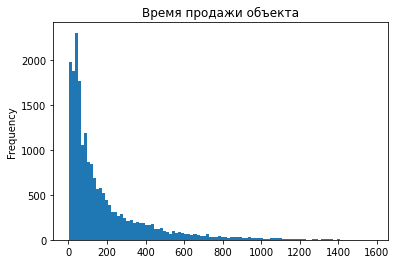

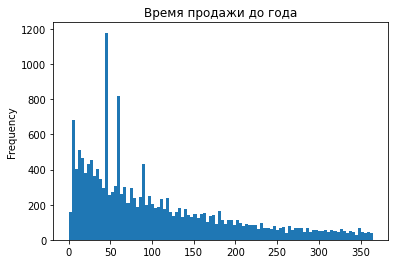

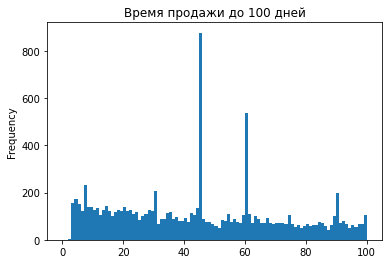

In [35]:
data['days_exposition'].plot(kind='hist', bins=100, title='Время продажи объекта')
plt.show()
data['days_exposition'].plot(kind='hist', bins=100, range=(0, 365), title='Время продажи до года')
plt.show()
data['days_exposition'].plot(kind='hist', bins=100, range=(0, 100), title='Время продажи до 100 дней')
plt.show()

In [36]:
data['days_exposition'].describe()

count    20284.000000
mean       180.895977
std        219.965700
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Всего четверть объектов продается менее, через за полтора месяца (быстрая продажа). Медианное значение составляет чуть более трех месяцев. Среднее арифметическое - практически полгода. Продажа более девяти месяце может считаться долгой. На графике отмечаются вероятные выбросы в районе 5, 30, 45, 60 и 90 дней. Возможно, это объявления, которые выставлялись платно: VIP, Gold, Silver и т.д., которые после истечения срока снимались. 

**Какие факторы больше всего влияют на полную стоимость объекта.**

0.6879076150510994

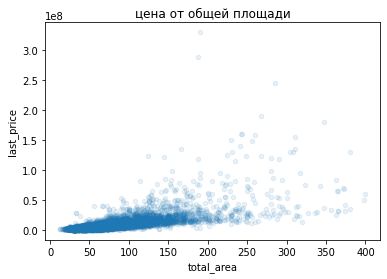

In [37]:
data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.1, title='цена от общей площади') # цена от общей площади
data['total_area'].corr(data['last_price'])

0.6054785581282043

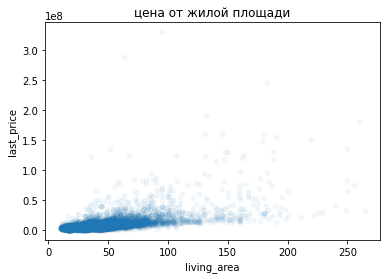

In [38]:
data.plot(x='living_area', y='last_price', kind='scatter', alpha=0.05, title='цена от жилой площади') # цена от жилой площади
data['living_area'].corr(data['last_price'])

0.5313695290149104

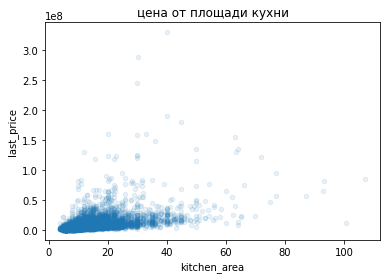

In [39]:
data.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.1, title='цена от площади кухни') # цена от площади кухни
data['kitchen_area'].corr(data['last_price'])

0.4004491262117353

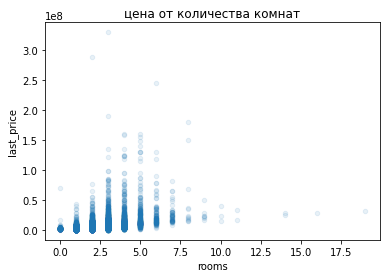

In [40]:
data.plot(x='rooms', y='last_price', kind='scatter', alpha=0.1, title='цена от количества комнат') # цена от количества комнат
data['rooms'].corr(data['last_price'])

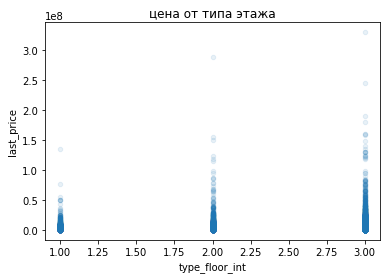

In [41]:
def type_floor_int(word):
    if word == 'Первый':
        return 1
    if word == 'Последний':
        return 2
    return 3
    
data['type_floor_int'] = data['type_floor'].apply(type_floor_int)

data.plot(x='type_floor_int', y='last_price', kind='scatter', alpha=0.1, title='цена от типа этажа') # цена от типа этажа
plt.show()

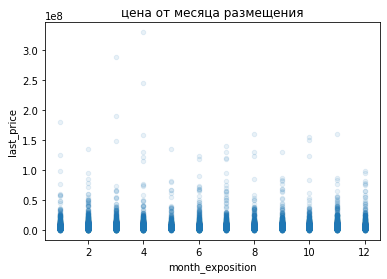

In [42]:
data.plot(x='month_exposition', y='last_price', kind='scatter', alpha=0.1, title='цена от месяца размещения') # цена от месяца размещения
plt.show()

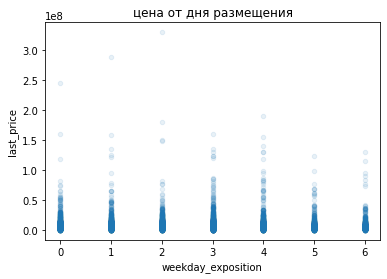

In [43]:
data.plot(x='weekday_exposition', y='last_price', kind='scatter', alpha=0.1, title='цена от дня размещения') # цена от дня размещения
plt.show()

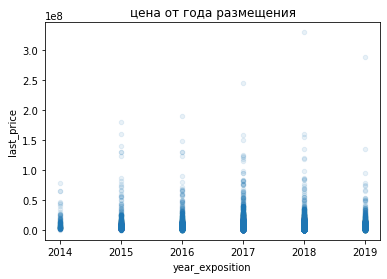

In [44]:
data.plot(x='year_exposition', y='last_price', kind='scatter', alpha=0.1, title='цена от года размещения') # цена от года размещения
plt.show()

На полную стоимость объекта наибольшее влияние оказывает его площадь. Наибольшая корреляция отмечается между общей площадью и стоимостью, но также заметная корреляция между стоимостью и жилой площадью, а также площадью кухни. В меньшей степени стоимость зависит от количества комнат. От типа этажа, года, месяца, дня размещения объявления стоимоть совершенно не зависит.

**Cредняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Населённые пункты с самой высокой и низкой стоимостью квадратного метра.**

In [45]:
data_for_1_meter = data.pivot_table(index='locality_name', values='price_for_1_meter', aggfunc=['count', 'mean'])
data_for_1_meter.columns=['count', 'mean']
data_for_1_meter.sort_values(by='count', ascending=False).head(11)

,count,mean
locality_name,,
санкт-петербург,15554,114444.550167
поселок мурино,546,85397.633333
поселок шушары,438,78577.014384
всеволожск,397,68719.322166
пушкин,367,103079.259128
колпино,338,75424.581953
поселок парголово,327,90175.915291
гатчина,307,68746.147231
деревня кудрово,298,92463.897987


In [46]:
count_of_10 = 205 # значение больше 11 населенного пункта в таблице и меньше 10 
data_for_1_meter_mean = data_for_1_meter.query('count > @count_of_10')
data_for_1_meter_mean['mean'].mean()

83521.94857419602

In [47]:
data_for_1_meter.sort_values(by='mean', ascending=False).head()

,count,mean
locality_name,,
зеленогорск,24,115122.800000
санкт-петербург,15554,114444.550167
поселок репино,4,104238.600000
пушкин,367,103079.259128
сестрорецк,181,101741.402762


In [48]:
data_for_1_meter.sort_values(by='mean').head()

,count,mean
locality_name,,
деревня старополье,3,11206.233333
поселок станции свирь,2,11481.500000
деревня вахнова кара,1,11688.300000
деревня выскатка,2,12335.450000
поселок совхозный,2,12629.150000


Средняя цена одного кв. м. в населенных пунктах с наибольшим кол-вом объявлений - около `83500 рублей`. 
Самая высокая стоимость кв. м. отмечается в населенных пунктах: `Зеленогорск, Санкт-Петербург, поселок Репино, Пушкин, Сестрорецк`.
Самая низкая стоимость кв. м. отмечается в населенных пунктах: `деревня Старополье, поселок станции Свирь, деревня Вахнова Кара, деревня Выскатка, поселок Совхозный`.

**Влияние расстояния от центра Санкт-Петербурга на стоимость объектов.**

In [49]:
data_spb = data.query('locality_name == "санкт-петербург"')
min_distance = data_spb['city_centers_km'].min()
max_distance = data_spb['city_centers_km'].max()
print(f'Минимальное расстояние объекта до центра: {min_distance} км')
print(f'Максимальное расстояние объекта до центра: {max_distance} км')
cor = data_spb['city_centers_km'].corr(data_spb['last_price'])
print(f'Корреляция цены от расстояния до центра в Санкт-Петербурге: {cor}')

Минимальное расстояние объекта до центра: 0.2 км
Максимальное расстояние объекта до центра: 29.5 км
Корреляция цены от расстояния до центра в Санкт-Петербурге: -0.31962769262475654


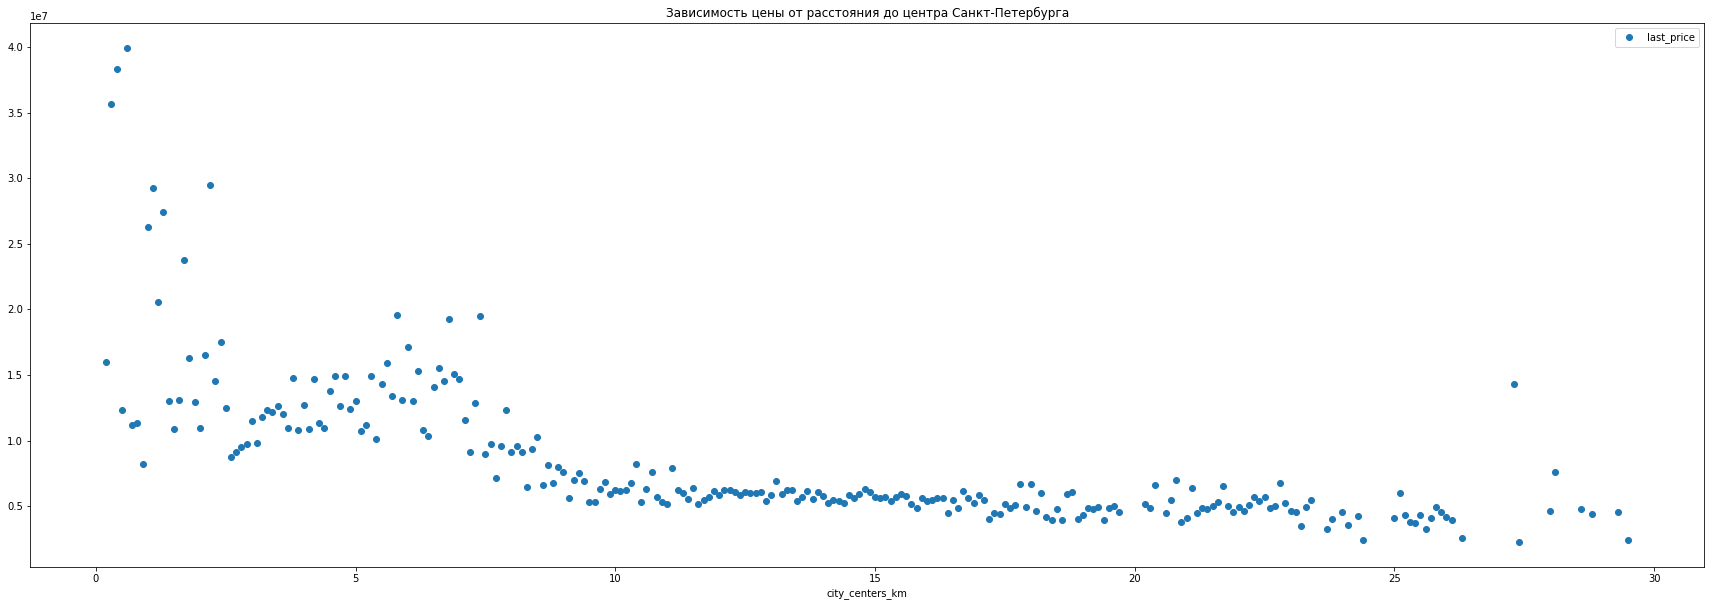

In [50]:
data_spb.pivot_table(index='city_centers_km', values='last_price').plot(style='o', figsize=(30, 10), title='Зависимость цены от расстояния до центра Санкт-Петербурга')
plt.show()

Объекты в Санкт-Петербурге находятся на расстояние от центра в диапазоне 0,2-29,5 км. Коэффициент корреляции отрицательный, что означает, чем ближе объект к центру, тем больше его цена. Такой же вывод можно сделать и из графика. Самые дорогие объекты расположены на расстоянии до 7,5 км от центра. Далее цена постепенно снижается.

### Общий вывод

- Большинство продаваемых объектов имеют площадь от 30 до 70 кв. м. с 1-3 комнатами. Также большинство объектов стоит от 2,5 до 7,5 млн. рублей. Соотвественно, если при такой квадратуре и комнатности цена будет нижен 2,5 млн. рублей необходимо пристально изучить объект, возможно, это мошенничество.

- Летом обычно выставляют меньше всего объявлений, если нашли "удачную" цену, то тогда тщательно отнестись к покупке объекта, поскольку это может быть мошенничество, к примеру, люди все лето на даче, кто-то вторгся в их квартиру, подделал документы и продает второпях.

- Большинство объектов продается в срок от 3 месяцев до полугода. Если объявление было выставлено более полугода, возможно с объектом не все в порядке, к примеру нечистые документы.

- Наибольшее влияние на стоимость оказывает площадь объекта. При низкой стоимости объекта по сравнению с другими схожей квадратуры необходимо остерегаться мошенничества.

- Объявление о продаже собственной недвижимости можно выставлять круглогодично, это никак не влияет на стоимость.

- Самая высокая стоимость кв. м. отмечается в городах Зеленогорск, Санкт-Петербург, Пушкин, Сестрорецк, а также в поселке Репино. Санкт-Петербург и Пушкин являются крупнейшими населенными пунктами в Ленинградской области, остальные из перечисленных населенных пунктов расположены на берегу залива и являются курортными.

- Самая низкая стоимость кв. м. отмечается в населенных пунктах: деревня Старополье, поселок станции Свирь, деревня Вахнова Кара, деревня Выскатка, поселок Совхозный.

- В Санкт-Петербурге самые дорогие объекты расположены на расстоянии до 7,5 км от центра. Далее цена постепенно снижается.